# Get Data From API's

In [148]:
import pandas as pd
import requests

In [149]:
url = 'https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd'
response = requests.get(url)
data = response.json()

In [150]:
df = pd.DataFrame(data)

In [151]:
df.drop(columns=['image','roi','symbol','id','max_supply'], inplace=True)

In [152]:
df.dropna(inplace=True)

In [153]:
df['current_price'] = df['current_price'].round(2).astype(float)

In [154]:
df["market_cap_billion"] = df["market_cap"] / 1000000000
df["market_cap_million"] = df["market_cap"] / 1000000


In [155]:
df['fully_diluted_billion'] = df['fully_diluted_valuation']/1000000000

In [156]:
df['total_volume_million'] = df['total_volume']/1000000
df['total_volume_billion'] = df['total_volume']/1000000000

In [157]:
df['high_24h'] = df['high_24h'].round(2)
df['low_24h'] = df['low_24h'].round(2)
df['price_change_24h'] = df['price_change_24h'].round(2)
df['price_change_percentage_24h'] = df['price_change_percentage_24h'].round(2)

In [158]:
df['ath_date'] = pd.to_datetime(df['ath_date'])

In [159]:
df['ath_month'] = df['ath_date'].dt.month
df['ath_year'] = df['ath_date'].dt.year
df['ath_day'] = df['ath_date'].dt.day

In [160]:
df['last_updated'] = pd.to_datetime(df['last_updated'])

In [161]:
df["last_updated_date"] = df["last_updated"].dt.date
df["last_updated_time"] = df["last_updated"].dt.time
df["last_updated_hour"] = df["last_updated"].dt.hour


In [162]:
df['price_vs_ath_pct'] = (df['current_price']/df['ath'] - 1)*100
df['price_vs_atl_pct'] = (df['current_price']/df['atl'] - 1)*100

In [163]:
df['market_cap'][0]

np.int64(1746680097470)

In [164]:
df['market_cap_pct'] = (df['market_cap']/df['market_cap'].sum()) * 100

In [165]:
df["volatility_24h"] = df["high_24h"] - df["low_24h"]


In [166]:
df["tier"] = pd.cut(df["market_cap_rank"], bins=[0,10,50,90,df["market_cap_rank"].max()], labels=["Top10","Top50","Top100","Others"])


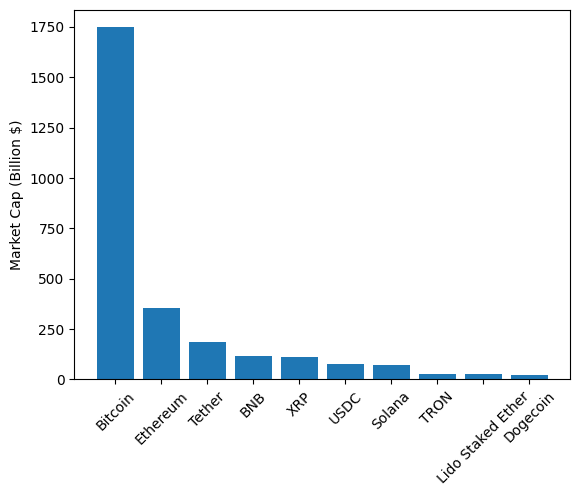

In [167]:
import matplotlib.pyplot as plt
top10 = df.nsmallest(10, "market_cap_rank")
plt.bar(top10["name"], top10["market_cap_billion"])
plt.ylabel("Market Cap (Billion $)")
plt.xticks(rotation=45)
plt.show()


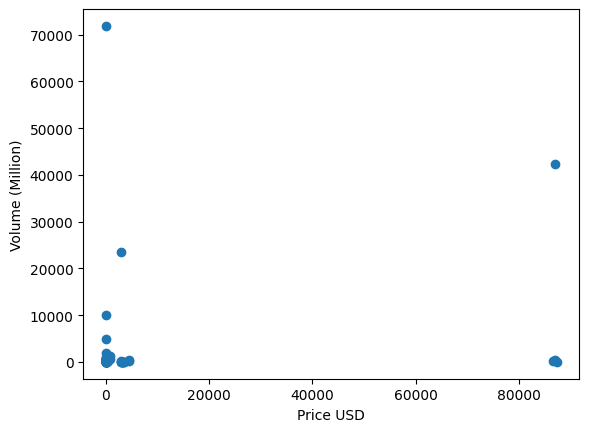

In [168]:
plt.scatter(df["current_price"], df["total_volume_million"])
plt.xlabel("Price USD")
plt.ylabel("Volume (Million)")
plt.show()
